# Hack The Crisis Sweden
## Data Handling and analysis
### Richard Wang


In [1]:
import pandas as pd
import numpy as np

In [2]:
dfind = pd.read_excel('./git/000002YB.xlsx', skiprows=2)
dfind.columns = ['Industry Classification', 'Company size', '2018', '2019']
dfind = dfind.fillna(method = 'ffill')
dfind

,Industry Classification,Company size,2018,2019
0,01 agricultural establishments and establishme...,1-4 employees,6585.0,6445.0
1,01 agricultural establishments and establishme...,5-9 employees,874.0,890.0
2,01 agricultural establishments and establishme...,10-19 employees,253.0,252.0
3,01 agricultural establishments and establishme...,20-49 employees,86.0,90.0
4,01 agricultural establishments and establishme...,50-99 employees,23.0,23.0
...,...,...,...,...
647,Database:,200-499 employees,0.0,0.0
648,Statistical database,200-499 employees,0.0,0.0
649,Statistical database,200-499 employees,0.0,0.0
650,Internal reference code:,200-499 employees,0.0,0.0


In [3]:
terms = ['bar', 'restaurants', 'delivery', 'retail', 'care', 'transport']
dfind1 = dfind[dfind["Industry Classification"].str.contains('|'.join(terms),na =False)]
dfind1 = dfind1.groupby(['Industry Classification', 'Company size']).agg({'2019':'sum'})
dfind1 = dfind1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
dfind1.columns = ['Industry Classification', 'Company size', '2019_norm']
dfind2 = dfind[dfind["Industry Classification"].str.contains('|'.join(terms),na =False)]
dfind2 = pd.merge(dfind2, dfind1, how='left', on =['Industry Classification', 'Company size'])
dfind2

,Industry Classification,Company size,2018,2019,2019_norm
0,30 industry for other transport equipment,1-4 employees,213.0,218.0,64.306785
1,30 industry for other transport equipment,5-9 employees,48.0,40.0,11.799410
2,30 industry for other transport equipment,10-19 employees,28.0,32.0,9.439528
3,30 industry for other transport equipment,20-49 employees,30.0,30.0,8.849558
4,30 industry for other transport equipment,50-99 employees,11.0,11.0,3.244838
5,30 industry for other transport equipment,100-199 employees,6.0,7.0,2.064897
6,30 industry for other transport equipment,200-499 employees,1.0,1.0,0.294985
7,"47 retail trade, except of motor vehicles and ...",1-4 employees,14928.0,14837.0,67.257480
8,"47 retail trade, except of motor vehicles and ...",5-9 employees,4062.0,3977.0,18.028105
9,"47 retail trade, except of motor vehicles and ...",10-19 employees,1907.0,1841.0,8.345422


In [4]:
dfind_rest = dfind2[dfind2["Industry Classification"]== '56 restaurants, catering establishments, bars']
dfind_rest

,Industry Classification,Company size,2018,2019,2019_norm
28,"56 restaurants, catering establishments, bars",1-4 employees,10744.0,11009.0,61.287090
29,"56 restaurants, catering establishments, bars",5-9 employees,4013.0,4171.0,23.219952
30,"56 restaurants, catering establishments, bars",10-19 employees,2020.0,1986.0,11.056060
31,"56 restaurants, catering establishments, bars",20-49 employees,664.0,672.0,3.741023
32,"56 restaurants, catering establishments, bars",50-99 employees,86.0,75.0,0.417525
33,"56 restaurants, catering establishments, bars",100-199 employees,29.0,32.0,0.178144
34,"56 restaurants, catering establishments, bars",200-499 employees,23.0,18.0,0.100206


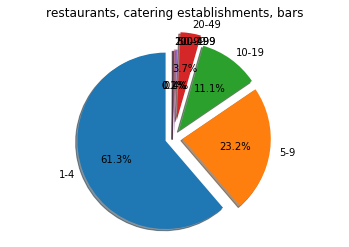

In [5]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['1-4', '5-9', '10-19', '20-49', '50-99', '100-199', '200-499'] 
sizes = dfind_rest['2019_norm']
explode = (0.1, 0.1, 0.1, 0.2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('restaurants, catering establishments, bars')
plt.show()

In [6]:
dfba = pd.read_excel('./Hero Demographic Data (1).xlsx', skiprows=4, sheet_name='Small Businesses')
dfba = dfba.drop(dfba.columns[0], axis =1)

In [7]:
dfba.columns =['Region','Department within industry SNI 2007', '0','1-4','5-9','10-19','20-49','50-99','100-199','200-499','500-','Totalt']
dfba

,Region,Department within industry SNI 2007,0,1-4,5-9,10-19,20-49,50-99,100-199,200-499,500-,Totalt
0,Non Swedish,total,12902,1410.0,103.0,20.0,15.0,3.0,1.0,NaN,NaN,14454.0
1,Non Swedish,Missing department,NaN,143.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,815.0
2,Non Swedish,"A Agriculture, forestry and fishing",NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2156.0
3,Non Swedish,B Extraction of minerals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4,Non Swedish,C Manufacturing,NaN,122.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...
490,Norrbotten,Q Care and care,351,277.0,163.0,128.0,92.0,54.0,28.0,8.0,6.0,1107.0
491,Norrbotten,"R Culture, pleasure and leisure",1184,272.0,57.0,39.0,10.0,3.0,1.0,NaN,NaN,1566.0
492,Norrbotten,S Other service activities,1190,381.0,61.0,32.0,15.0,2.0,NaN,NaN,NaN,1681.0
493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
terms = ['bar', 'restaurant', 'retail','transport']
dfba_rest = dfba[dfba["Department within industry SNI 2007"].str.contains('|'.join(terms),na =False)]
dfba_rest = dfba_rest.fillna(0)
dfba_rest['small business'] = dfba_rest['0'] + dfba_rest['1-4'] + dfba_rest['5-9'] + dfba_rest['10-19'] + dfba_rest['20-49']
dfba_rest['samll business ratio'] = dfba_rest['small business']/dfba_rest['Totalt']
sm_rest_sum = dfba_rest['small business'].sum()
dfba_rest['perct_country']= dfba_rest['small business']/sm_rest_sum
dfba_rest

,Region,Department within industry SNI 2007,0,1-4,5-9,10-19,20-49,50-99,100-199,200-499,500-,Totalt,small business,samll business ratio,perct_country
10,Non Swedish,I hotel and restaurant operations,98,13.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,114.0,114.0,1.000000,0.003217
33,Stockholm,I hotel and restaurant operations,3202,3198.0,1527.0,896.0,453.0,112.0,25.0,9.0,0.0,9422.0,9276.0,0.984504,0.261746
57,Uppsala,I hotel and restaurant operations,372,365.0,157.0,96.0,41.0,7.0,0.0,0.0,0.0,1038.0,1031.0,0.993256,0.029092
79,Södermanland,I hotel and restaurant operations,318,342.0,118.0,51.0,38.0,8.0,1.0,0.0,0.0,876.0,867.0,0.989726,0.024465
102,Östergötland,I hotel and restaurant operations,431,478.0,214.0,119.0,50.0,10.0,0.0,0.0,0.0,1302.0,1292.0,0.992320,0.036457
124,Jönköping,I hotel and restaurant operations,355,340.0,144.0,84.0,36.0,7.0,1.0,0.0,0.0,967.0,959.0,0.991727,0.027061
146,Kronoberg,I hotel and restaurant operations,252,212.0,83.0,46.0,25.0,1.0,1.0,0.0,0.0,620.0,618.0,0.996774,0.017438
168,Kalmar,I hotel and restaurant operations,413,341.0,122.0,51.0,35.0,4.0,0.0,0.0,0.0,966.0,962.0,0.995859,0.027145
190,Gotland,I hotel and restaurant operations,222,130.0,56.0,30.0,12.0,3.0,0.0,0.0,0.0,453.0,450.0,0.993377,0.012698
212,Blekinge,I hotel and restaurant operations,180,221.0,66.0,37.0,7.0,3.0,0.0,0.0,0.0,514.0,511.0,0.994163,0.014419


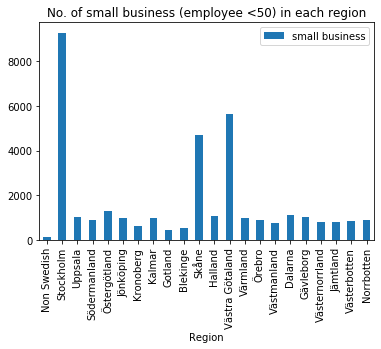

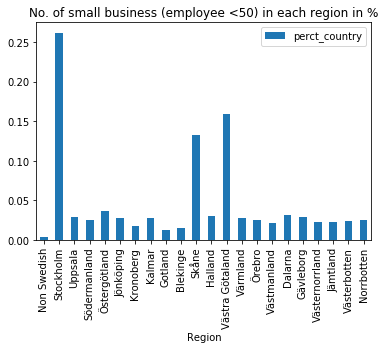

In [9]:
# business with employee smaller than 49
# business are is hotel and restaurant
small_restplt = dfba_rest.plot.bar(x = 'Region', y = 'small business', rot =90, title = 'No. of small business (employee <50) in each region')
sm_perct_country = dfba_rest.plot.bar(x = 'Region', y = 'perct_country', rot =90, title = 'No. of small business (employee <50) in each region in %')

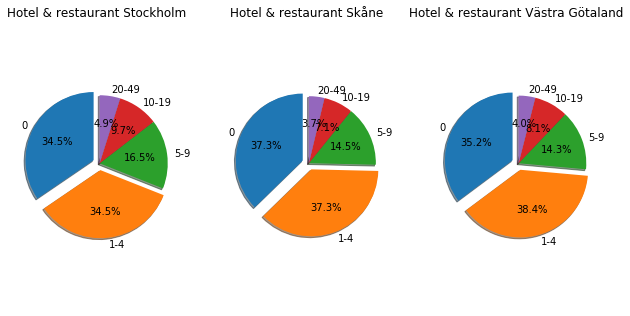

In [10]:
labels = ['0', '1-4', '5-9', '10-19', '20-49'] 
sizes1 = (3202, 3198.0, 1527.0, 896.0, 453.0)
sizes2 = (1743, 1745.0, 680.0, 331.0, 175.0)
sizes3 = (1977, 2156.0, 804.0, 457.0, 223.0)
explode = (0.1, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4.5), tight_layout=True)
ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Hotel & restaurant Stockholm')
ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Hotel & restaurant Skåne')

ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('Hotel & restaurant Västra Götaland')

plt.show()

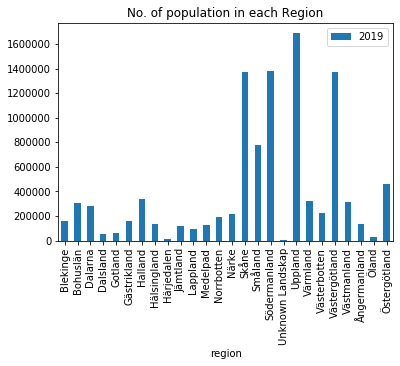

In [11]:
dfpop = pd.read_excel('./git/000000VK.xlsx', skiprows=2)
dfpop.columns =['region code', 'region', 'sex code','sex', '2019']
dfpop =dfpop.fillna(method ='ffill')
dfpop = dfpop.groupby(['region']).agg({'2019':'sum'}).reset_index()
popplt = dfpop.plot.bar(x = 'region', y = '2019', rot =90, title = 'No. of population in each Region')

In [22]:
dfage = pd.read_excel('./git/000003O5.xlsx', skiprows=2)
dfage = dfage.drop(dfage.columns[0], axis =1)
dfage = dfage.fillna(method='ffill')

In [23]:
dfage = dfage.groupby(['region', 'age']).agg({'2020M01': 'sum'}).reset_index()
dfage

,region,age,2020M01
0,Blekinge county,0-4 years,6780
1,Blekinge county,15-24 years,17769
2,Blekinge county,25-34 years,19242
3,Blekinge county,35-44 years,17814
4,Blekinge county,45-54 years,20461
...,...,...,...
226,Östergötland county,55-64 years,54135
227,Östergötland county,65-74 years,50347
228,Östergötland county,75-84 years,35356
229,Östergötland county,85-94 years,12968


In [18]:
import re
def get_max_age(s):
    temp = re.findall(r'\d+', s)
    res = max(list(map(int, temp))) 
    return res

In [24]:
dfage['age_max'] = dfage['age'].apply(get_max_age)
dfage.loc[dfage.age_max < 15, 'age_group'] = 1
dfage.loc[(dfage.age_max < 65) & (dfage.age_max > 15), 'age_group'] = 2
dfage.loc[dfage.age_max > 65, 'age_group'] = 3
dfage = dfage.groupby(['region', 'age_group']).agg({'2020M01':'sum'}).reset_index()

In [26]:
dfage2 = dfage[dfage['age_group']== 2.0]
dfage2

,region,age_group,2020M01
1,Blekinge county,2.0,94640
4,Dalarna county,2.0,167780
7,Gotland county,2.0,34895
10,Gävleborg county,2.0,170052
13,Halland county,2.0,200710
16,Jämtland county,2.0,77680
19,Jönköping county,2.0,221771
22,Kalmar county,2.0,142928
25,Kronoberg county,2.0,122205
28,Norrbotten county,2.0,150075


### Employment survey

In [32]:
dfemp = pd.read_excel('./000000SB.xlsx', skiprows=2)
dfemp = dfemp.fillna(method='ffill')
dfemp.columns = ['region', 'industry', 'age_group', 'sex','number of people']
dfemp

,region,industry,age_group,sex,number of people
0,01 Stockholm county,011 Commissioned armed forces officers,16-24 years,men,0
1,01 Stockholm county,011 Commissioned armed forces officers,16-24 years,women,0
2,01 Stockholm county,011 Commissioned armed forces officers,25-29 years,men,8
3,01 Stockholm county,011 Commissioned armed forces officers,25-29 years,women,2
4,01 Stockholm county,011 Commissioned armed forces officers,30-34 years,men,27
...,...,...,...,...,...
56317,25 Norrbotten county,0002 occupations unidentifiable,50-54 years,women,80
56318,25 Norrbotten county,0002 occupations unidentifiable,55-59 years,men,163
56319,25 Norrbotten county,0002 occupations unidentifiable,55-59 years,women,60
56320,25 Norrbotten county,0002 occupations unidentifiable,60-64 years,men,162


In [36]:
dfemp = dfemp.groupby(['region', 'industry']).agg({'number of people':'sum'}).reset_index()
dfempsum = dfemp.groupby('region').agg({'number of people':'sum'}).reset_index()
dfempsum.columns = ['region', 'total']
dfemp = pd.merge(dfemp, dfempsum, how = 'left', on = 'region')
dfemp

,region,industry,number of people,total
0,01 Stockholm county,0002 occupations unidentifiable,55057,1106581
1,01 Stockholm county,011 Commissioned armed forces officers,225,1106581
2,01 Stockholm county,021 Non-commissioned armed forces officers,162,1106581
3,01 Stockholm county,"031 Armed forces occupations, other ranks",1404,1106581
4,01 Stockholm county,111 Legislators and senior officials,1013,1106581
...,...,...,...,...
3124,25 Norrbotten county,933 Dockers and ground personnel,135,113311
3125,25 Norrbotten county,"941 Fast-food workers, food preparation assist...",1886,113311
3126,25 Norrbotten county,952 Street and market vendors,5,113311
3127,25 Norrbotten county,961 Recycling collectors,291,113311


In [42]:
terms = ['bar', 'restaurant', 'food', 'catering', 'hotel']
dfemp_rest = dfemp[dfemp["industry"].str.contains('|'.join(terms),na =False)]
dfemp_rest = dfemp_rest.groupby(['region', 'total']).agg({'number of people':'sum'}).reset_index()
dfemp_rest['updates total'] = dfemp_rest['total']*1.14
dfemp_rest['updates people in restaurant'] = dfemp_rest['number of people']*1.14
dfemp_rest

,region,total,number of people,updates total,updates people in restaurant
0,01 Stockholm county,1106581,34450,1261502.34,39273.00
1,03 Uppsala county,169436,4005,193157.04,4565.70
2,04 Södermanland county,121532,3566,138546.48,4065.24
3,05 Östergötland county,201770,5371,230017.80,6122.94
4,06 Jönköping county,165047,3717,188153.58,4237.38
5,07 Kronoberg county,86864,1925,99024.96,2194.50
6,08 Kalmar county,102707,3460,117085.98,3944.40
7,09 Gotland county,24992,1047,28490.88,1193.58
8,10 Blekinge county,66576,1475,75896.64,1681.50
9,12 Skåne county,561787,17350,640437.18,19779.00


In [46]:
rest_emp = np.array([39273, 26854, 19779])*0.96 # number of employee in restaurant industry in stockholm, vgot, skåne
rest_emp.sum()*0.98

80820.3648

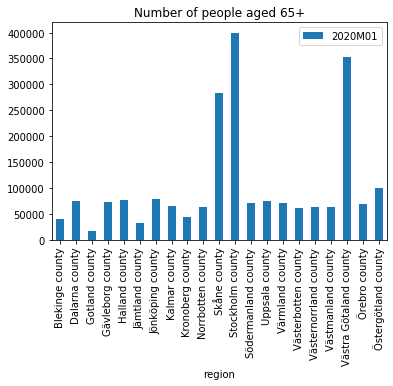

In [51]:
dfage3 = dfage[dfage['age_group'] == 3]#number of people aged 65+
popage3plt = dfage3.plot.bar(x = 'region', y = '2020M01', rot =90, title = 'Number of people aged 65+')

In [151]:
dfage.region.unique()

array(['Blekinge county', 'Dalarna county', 'Gotland county',
       'Gävleborg county', 'Halland county', 'Jämtland county',
       'Jönköping county', 'Kalmar county', 'Kronoberg county',
       'Norrbotten county', 'Skåne county', 'Stockholm county',
       'Södermanland county', 'Uppsala county', 'Värmland county',
       'Västerbotten county', 'Västernorrland county',
       'Västmanland county', 'Västra Götaland county', 'Örebro county',
       'Östergötland county'], dtype=object)

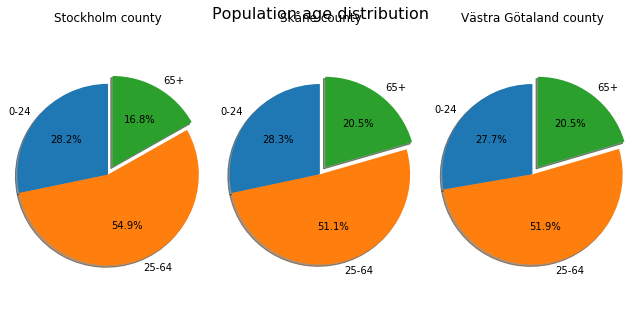

In [251]:
dfage_sthm=dfage[dfage['region']=='Stockholm county']
dfage_skn = dfage[dfage['region']=='Skåne county']
dfage_vgt = dfage[dfage['region']=='Västra Götaland county']
labels = ['0-24', '25-64', '65+'] 
sizes1 = dfage_sthm['2020M01']
sizes2 = dfage_skn['2020M01']
sizes3 = dfage_vgt['2020M01']
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4.5), tight_layout=True)
fig1.suptitle('Population age distribution', fontsize=16)
#fig1.tight_layout()
#fig1.subplots_adjust(top=0.9)

ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Stockholm county')

ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Skåne county')

ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('Västra Götaland county', )

fig1.tight_layout()
fig1.subplots_adjust(top = 0.90)
plt.show()

In [47]:
dfcorona = pd.read_excel('./git/Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Antal per dag region')

In [48]:
dfcorona_2 = pd.read_excel('./git/Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Totalt antal per region')
dfcorona_2 = dfcorona_2.fillna(0)
dfcorona_2.columns =['Region', 'Total cases','Cases per 100 K', 'Total intensive', 'Total deaths']
dfcorona_2 = dfcorona_2.drop(3, axis=0)
dfcorona_2.iloc[5, 0] = 'Jämtland'
dfcorona_2.iloc[12, 0] = 'Södermanland'
dfcorona_2['Region'] = dfcorona_2['Region'] + ' county'
dfcorona_2.columns = ['region', 'Total cases', 'Cases per 100 K', 'Total intensive',
       'Total deaths']
dfcorona_2

,region,Total cases,Cases per 100 K,Total intensive,Total deaths
0,Blekinge county,27.0,16.916656,2.0,1.0
1,Dalarna county,147.0,51.047691,10.0,14.0
2,Gotland county,12.0,20.105217,0.0,0.0
4,Gävleborg county,147.0,51.151428,12.0,4.0
5,Halland county,114.0,34.147278,10.0,8.0
6,Jämtland county,84.0,64.215271,1.0,0.0
7,Jönköping county,187.0,51.430283,15.0,13.0
8,Kalmar county,46.0,18.741394,2.0,1.0
9,Kronoberg county,45.0,22.335943,0.0,0.0
10,Norrbotten county,73.0,29.189142,10.0,1.0


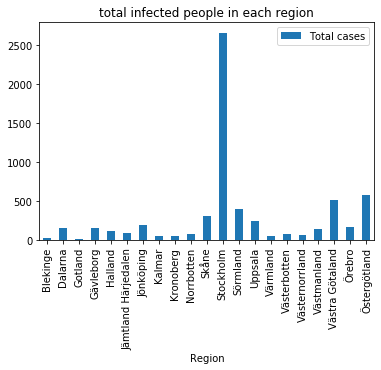

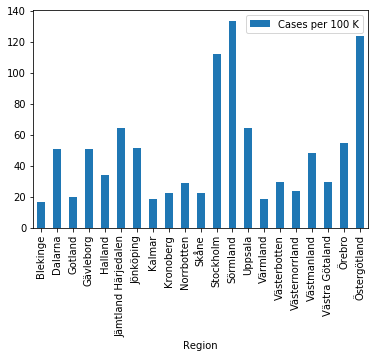

In [261]:
corona_plot = dfcorona_2.plot.bar(x = 'region', y = 'Total cases', rot =90, title= 'total infected people in each region')
corona_plot2 = dfcorona_2.plot.bar(x = 'region', y = 'Cases per 100 K', rot = 90,)

In [49]:
dfpop_county = dfage.groupby(['region']).agg({'2020M01':'sum'}).reset_index()

In [52]:
dfage3.columns = ['region', 'age_group', '2020M01_age65+']
dfcorona_2 = pd.merge(dfcorona_2, dfpop_county, how= 'left', on = ['region'])
dfcorona_2 = pd.merge(dfcorona_2, dfage3, on = ['region'], how = 'left')
dfcorona_2 = dfcorona_2.drop(['age_group'], axis =1)
dfcorona_2

,region,Total cases,Cases per 100 K,Total intensive,Total deaths,2020M01,2020M01_age65+
0,Blekinge county,27.0,16.916656,2.0,1.0,159610,39668
1,Dalarna county,147.0,51.047691,10.0,14.0,287895,74093
2,Gotland county,12.0,20.105217,0.0,0.0,59720,16116
3,Gävleborg county,147.0,51.151428,12.0,4.0,287366,72467
4,Halland county,114.0,34.147278,10.0,8.0,334124,76416
5,Jämtland county,84.0,64.215271,1.0,0.0,130806,32264
6,Jönköping county,187.0,51.430283,15.0,13.0,363730,79259
7,Kalmar county,46.0,18.741394,2.0,1.0,245405,64308
8,Kronoberg county,45.0,22.335943,0.0,0.0,201516,44727
9,Norrbotten county,73.0,29.189142,10.0,1.0,249948,63564


In [60]:
pop_sum= dfcorona_2['2020M01'].sum()
select_county = np.array([2379792, 1726778, 1378834])
select_county.sum()*0.2

1097080.8

In [57]:
total_emp = np.array([1261502.34, 888709.80, 640437.18])
total_emp.sum()

2790649.3200000003